In [57]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from pandas import read_csv
import numpy as np
import math
from keras.models import Sequential # type: ignore
from keras.layers import Dense, SimpleRNN # type: ignore
from keras import Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Read data from given url and extract the second column
def read_data(url):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
#Normalise data into (0,1) range 
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    return data, n

def get_train_test(split_percent, data):
    n = len(data)
    split = int(n * split_percent)
    train_data = data[:split]
    test_data = data[split:]
    return train_data, test_data

#Reshape data into input-output pairs with specified time steps
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    
    Y = dat[Y_ind]
    rows_x = len(Y)
#Prepare Training and testing data
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

#Get error of predictions to evaluate it


#Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
data, n = read_data(sunspots_url)

split_percent = 0.8
train_data, test_data = get_train_test(split_percent, data)

time_steps = 12


In [58]:
#print(train_data)
#print(get_train_test)

def get_XY_(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    print(Y_ind)
    Y = dat[Y_ind]
    rows_x = len(Y)

print(train_data[np.arange(time_steps, len(train_data), time_steps)].shape)

trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)



#print (testX.shape, testY.shape,trainX.shape,trainY.shape)


(187,)


In [59]:
model=None
model = Sequential()
model.add(SimpleRNN(3, return_sequences=True, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='adam')
#Make predictions
print(trainX.shape, testX.shape)
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print(train_predict.shape, test_predict.shape)


(187, 12, 1) (46, 12, 1)
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
(187, 12, 1) (46, 12, 1)


In [60]:
#Mean square error
def print_error(trainY, testY, train_predict, test_predict): 
    print(trainY.shape)
    print(testY.shape)
    print(trainY[100],train_predict[100])
    print(train_predict.shape, test_predict.shape)
    train_predict = train_predict.reshape(-1)
    test_predict = test_predict.reshape(-1)
    print(train_predict.shape, test_predict.shape)
    train_rmse = math.sqrt(mean_squared_error(trainY,train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))   

print_error(trainY, testY, train_predict, test_predict)


(187,)
(46,)
0.30732858 [[0.01466702]
 [0.06724776]
 [0.08826391]
 [0.08648642]
 [0.11069115]
 [0.09829485]
 [0.10937696]
 [0.10592178]
 [0.10500548]
 [0.11016116]
 [0.1078701 ]
 [0.11096393]]
(187, 12, 1) (46, 12, 1)
(2244,) (552,)


ValueError: Found input variables with inconsistent numbers of samples: [187, 2244]

ValueError: x and y must have same first dimension, but have shapes (233,) and (2796,)

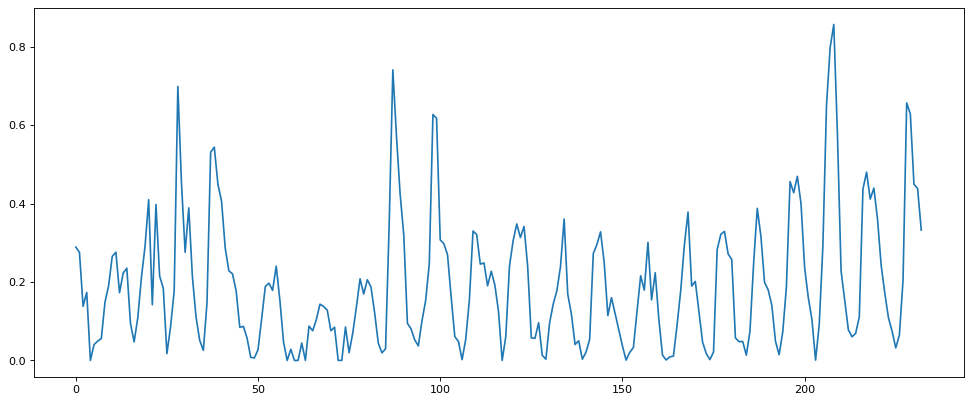

In [7]:
plot_result(trainY, testY, train_predict, test_predict)